In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv("data/prepared_data.csv")

# Support vector machines

In [4]:
X = df['cleaned_text']
y = df['LabelMapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(max_df=0.8, ngram_range=(1, 2)), 'cleaned_text1'),
        ('num', StandardScaler(), ['emoticon1', 'emoticon2', 'emoticon3'])
    ]
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('svm', LinearSVC(C=1.0, max_iter=100, random_state=42))
    ], verbose = True)

In [16]:
pipeline.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  17.0s


/opt/conda/envs/dspt/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[Pipeline] ............... (step 2 of 2) Processing svm, total=  41.6s


/opt/conda/envs/dspt/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_df=0.8,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'cleaned_text1'),
                                                 ('num', StandardScaler(),
                                                  ['emoticon1', 'emoticon2',
                                                   'emoticon3'])])),
                ('svm', LinearSVC(max_iter=100, random_state=42))],
         verbose=True)

In [17]:
y_pred = pipeline.predict(X_test)

In [18]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7123507850324402


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.79      0.76     17993
           0       0.53      0.43      0.47     12600
           1       0.78      0.82      0.80     20424

    accuracy                           0.71     51017
   macro avg       0.68      0.68      0.68     51017
weighted avg       0.70      0.71      0.71     51017



           Predicted -1  Predicted 0  Predicted 1
Actual -1         14349         2245         1399
Actual 0           3853         5244         3503
Actual 1           1314         2343        16767


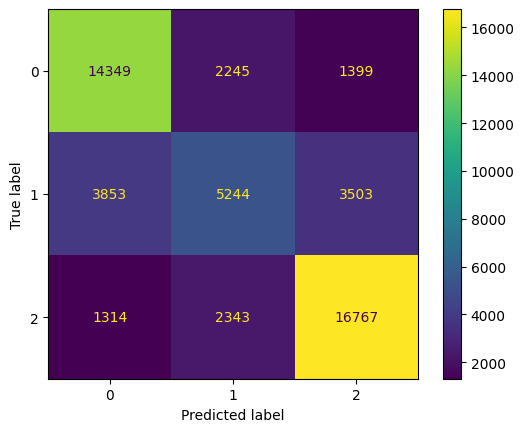

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual -1', 'Actual 0', 'Actual 1'], columns=['Predicted -1', 'Predicted 0', 'Predicted 1'])
print(cm_df)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [6]:
# Create a pipeline with CountVectorizer and LinearSVC
pipeline = Pipeline([
    ('count', CountVectorizer()),
    ('svm', LinearSVC(C=1.0, max_iter=100, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

/opt/conda/envs/dspt/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/conda/envs/dspt/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.68      0.79      0.73     17993
           0       0.50      0.31      0.38     12600
           1       0.72      0.78      0.75     20424

    accuracy                           0.67     51017
   macro avg       0.63      0.63      0.62     51017
weighted avg       0.65      0.67      0.65     51017



In [7]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6708548131015152


In [9]:
# Create a pipeline with HashingVectorizer and LinearSVC
pipeline = Pipeline([
    ('hash', HashingVectorizer(n_features=2**10)),  # Adjust n_features as needed
    ('svm', LinearSVC(C=1.0, max_iter=100, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

/opt/conda/envs/dspt/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.64      0.74      0.69     17993
           0       0.50      0.25      0.33     12600
           1       0.66      0.77      0.71     20424

    accuracy                           0.63     51017
   macro avg       0.60      0.59      0.58     51017
weighted avg       0.61      0.63      0.61     51017



In [10]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6326126585255895


In [5]:
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec model (e.g., Google News vectors)
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Define a custom transformer to convert text to Word2Vec embeddings
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
        self.vector_size = model.vector_size
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.array([
            np.mean([self.model[word] for word in text.split() if word in self.model] or [np.zeros(self.vector_size)], axis=0)
            for text in X
        ])


# Create a pipeline with Word2VecTransformer and LinearSVC
pipeline = Pipeline([
    ('word2vec', Word2VecTransformer(word2vec)),
    ('svm', LinearSVC(C=1.0, max_iter=10000, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'